In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
import os

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score

In [2]:
img_mat = []
img_names = []
DFs = []
for file in os.listdir('./SHIWANGMO/images/'):
    if file.startswith('Base'):
        for sub_file in os.listdir('./SHIWANGMO/images/' + file):
            fileName = './SHIWANGMO/images/' + file + '/' + sub_file
            if sub_file.endswith('.tif'):
                img = cv2.imread(fileName)
                img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img_gray = cv2.resize(img_gray, (140, 96))
                img_arr = img_gray.ravel()
                img_mat.append(img_arr)
                img_names.append(sub_file)
            if sub_file.endswith('.xls'):
                df = pd.read_excel(fileName)
                DFs.append(df)
                

df = pd.concat(DFs)
name_grade_dict = dict()
for name, grade in zip(df['Image name'], df['Retinopathy grade']):
    name_grade_dict[name] = grade
    
del df
img_mat = np.array(img_mat)

labels = []
for name in img_names:
    label = name_grade_dict[name]
    labels.append(label)
    
labels = np.array(labels)

In [3]:
mask = (labels == 0 ) | (labels == 3 )
y =  labels[mask]
X = img_mat[mask]

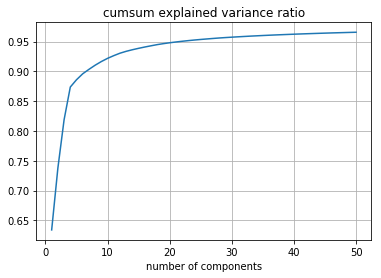

In [4]:
pca = PCA()
pca.fit(X)
cumsum_ratios = np.cumsum(pca.explained_variance_ratio_)[:50]
plt.plot(range(1,51), cumsum_ratios)
plt.xlabel('number of components')
plt.title('cumsum explained variance ratio')
plt.grid()
plt.show()

In [5]:
pca = PCA(n_components=20)
pca.fit(X)
pca_X = pca.transform(X)

In [6]:
clf = SVC(kernel='linear')
scores = cross_val_score(clf, pca_X, y, cv = 10)

In [8]:
print(scores)

[0.77901235 0.77901235 0.77901235 0.77901235 0.7875     0.7875
 0.7875     0.7835443  0.7835443  0.7835443 ]


In [4]:
print(np.mean(scores))

0.7829182299999999


In [11]:
img = cv2.imread(fileName)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


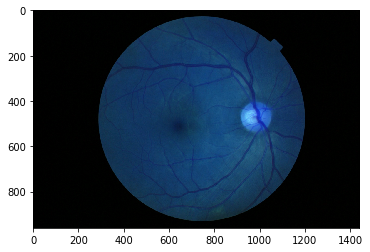

In [12]:
plt.imshow(img)

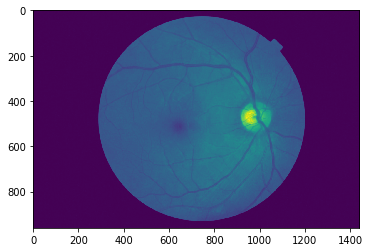

In [13]:
plt.imshow(img_gray)

In [18]:
# KNN
KNN = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(KNN, pca_X, y, cv = 10)
print(scores)

[0.67901235 0.77777778 0.60493827 0.28395062 0.7125     0.5125
 0.75       0.75949367 0.67088608 0.6835443 ]


In [5]:
print(np.mean(scores))

0.643460307
